In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Cardetails.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.drop(['torque'],axis = 1,inplace=True)

In [5]:
df.shape

(8128, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [7]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.duplicated().sum()

1189

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(6718, 12)

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [13]:
# lets check the unique values in every columns
for i in df.columns:
    print( i ,":-")
    x = len(df[i].unique())
    if x<50:
        print(df[i].unique())
    else:
        print(x)
    
    print("*****************************************")


name :-
1983
*****************************************
year :-
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
*****************************************
selling_price :-
670
*****************************************
km_driven :-
898
*****************************************
fuel :-
['Diesel' 'Petrol' 'LPG' 'CNG']
*****************************************
seller_type :-
['Individual' 'Dealer' 'Trustmark Dealer']
*****************************************
transmission :-
['Manual' 'Automatic']
*****************************************
owner :-
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
*****************************************
mileage :-
393
*****************************************
engine :-
121
*****************************************
max_power :-
321
*****************************************
seats :-
[ 5.  4.  7.  8.  6.  9. 10. 14.  2.]
****************

In [14]:
# lets handel name feaure first

In [15]:
df['name']

0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2                Honda City 2017-2020 EXi
3               Hyundai i20 Sportz Diesel
4                  Maruti Swift VXI BSIII
                      ...                
8121    Maruti Wagon R VXI BS IV with ABS
8122           Hyundai i20 Magna 1.4 CRDi
8123                    Hyundai i20 Magna
8124                Hyundai Verna CRDi SX
8125               Maruti Swift Dzire ZDi
Name: name, Length: 6718, dtype: object

In [16]:
#function to extract first name in the given names 
def extractor(value):
    value = value.split()[0]
    return value.strip()

In [17]:
df['name'] = df['name'].apply(extractor)

In [18]:
df['name'].unique().shape

(31,)

In [19]:
# we can also use extractor function to extract the first value in mileage	engine	max_power

df['mileage'] = df['mileage'].apply(extractor)
df['engine'] = df['engine'].apply(extractor)



In [20]:
def numeric_ex(value):
    value = value.split()[0]
    if value == 'bhp':
        return 
    else:
        return float(value.strip())

In [21]:
df['max_power'] = df['max_power'].apply(numeric_ex)

In [22]:
df['engine'] = df['engine'].astype(float)
df['mileage'] = df['mileage'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6717 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 682.3+ KB


In [24]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        1
seats            0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.duplicated().sum()

19

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
numerical_features = df.select_dtypes(exclude=('object'))

<Axes: >

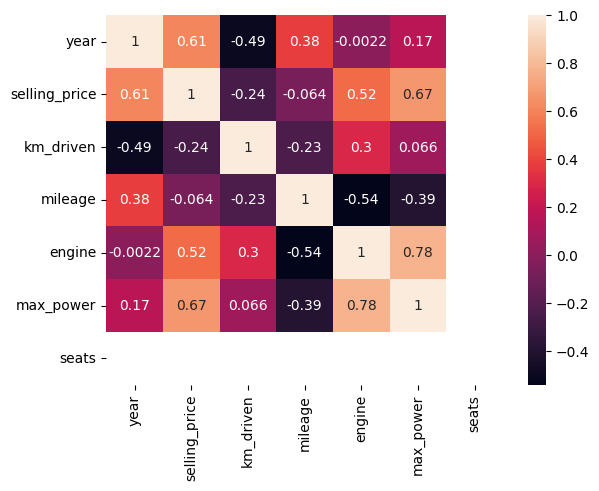

In [55]:
sns.heatmap(numerical_features.corr(),annot=True)

<Axes: >

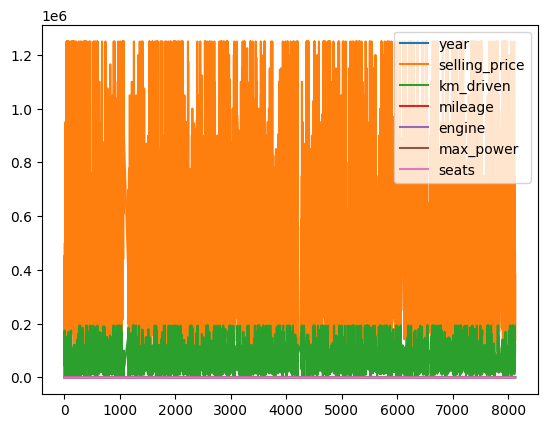

In [56]:
numerical_features.plot()

<Axes: >

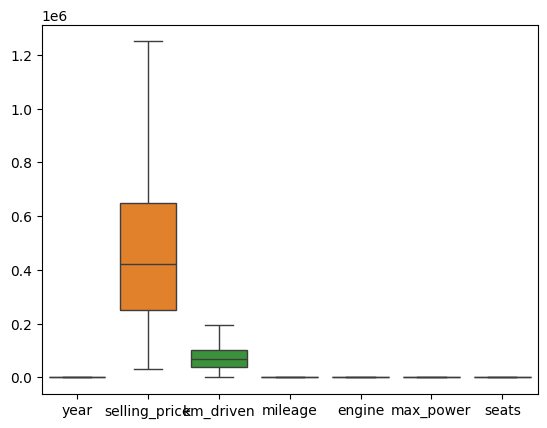

In [57]:
sns.boxplot(df)

In [58]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [59]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [60]:
outliers = ['year','selling_price','km_driven','mileage','engine','max_power','seats']
for i in outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3+1.5*(iqr)
    lower_limit = q1-1.5*(iqr)
    
    df.loc[df[i]>upper_limit,i] = upper_limit
    df.loc[df[i]<lower_limit,i] = lower_limit
    


<Axes: >

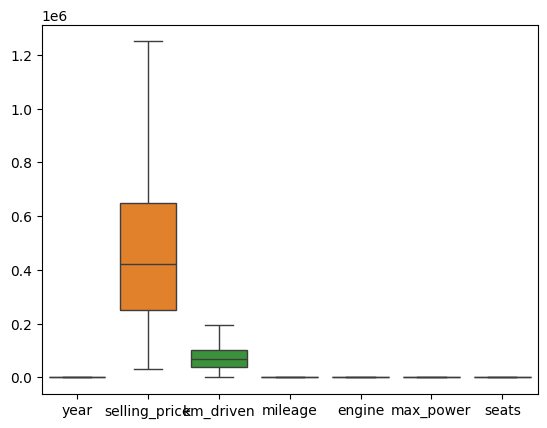

In [61]:
sns.boxplot(df)

In [62]:
df.duplicated().sum()

0

In [63]:
df.drop_duplicates(inplace= True)

In [64]:
df.shape

(6689, 12)

# model training

In [65]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [66]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [67]:
X = df.drop(['selling_price'],axis =1)
y = df['selling_price']



In [68]:
X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [69]:
X['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [70]:
numerical_features = X.select_dtypes(exclude=('object')).columns
categorical_features = X.select_dtypes(include=('object')).columns

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 ,random_state=1)

In [72]:
numerical_pipeline = Pipeline(steps=[
    ('scaler',StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('ohe',OneHotEncoder())
])


preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_pipeline,numerical_features),
    ('cat',categorical_pipeline,categorical_features)
])

In [73]:
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(n_estimators=50,random_state=42))
])

In [74]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [75]:
y_pred = model.predict(X_test)

In [76]:
print(r2_score(y_test,y_pred))

0.9117187979566826


<Axes: xlabel='selling_price', ylabel='selling_price'>

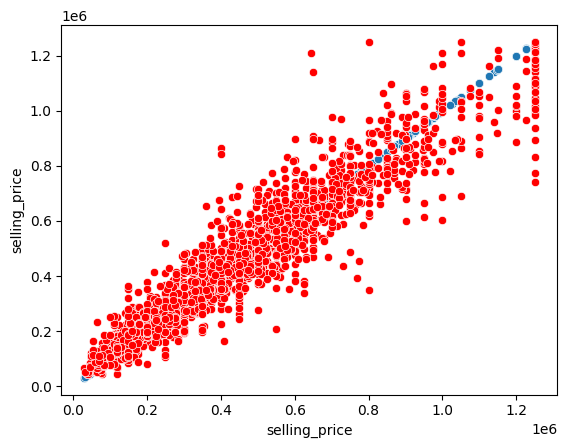

In [77]:
sns.scatterplot(x=y_test,y=y_test)
sns.scatterplot(x=y_test,y=y_pred, c = 'red')

In [78]:
import pickle
file = open('model.pkl','wb')
pickle.dump(model, file)
file.close()

In [79]:
X.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [80]:
# Maruti	2014	145500	Diesel	Individual	Manual	First Owner	23.40	1248.0	74.00	5.0

data = {
    'name':'Maruti',
    'year':2014,
    'km_driven':145500,
    'fuel':'Diesel',
    'seller_type':'Individual',
    'transmission':'Manual',
    'owner':'First Owner',
    'mileage':23.40,
    'engine':1248.0,
    'max_power':74.00,
    'seats':5.0



}

In [81]:
data1 = pd.DataFrame(data,index=[0])

In [82]:
data1

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0


In [83]:
model.predict(data1)

array([465439.92])